### Binary Classification of the Iranian churn dataset using learning models

In this notebook we will use the Iranian churn dataset to predict the churn of the customers . The dataset is available in the [UCI Machine Learning Repository](https://archive-beta.ics.uci.edu/dataset/592/iranian+churn+dataset).

#### Information about the dataset

This dataset is randomly collected from an Iranian telecom company database over a period of 12 months. A total of 3150 rows of data, each representing a customer, bear information for 13 columns. The attributes that are in this dataset are call failures, frequency of SMS, number of complaints, number of distinct calls, subscription length, age group, the charge amount, type of service, seconds of use, status, frequency of use, and Customer Value.

All of the attributes except for attribute churn is the aggregated data of the first 9 months. The churn labels are the state of the customers at the end of 12 months. The three months is the designated planning gap.

#### Attribute Information
 - Anonymous Customer ID
 - Call Failures: number of call failures
 - Complains: binary (0: No complaint, 1: complaint)
 - Subscription Length: total months of subscription
 - Charge Amount: Ordinal attribute (0: lowest amount, 9: highest  - amount)
 - Seconds of Use: total seconds of calls
 - Frequency of use: total number of calls
 - Frequency of SMS: total number of text messages
 - Distinct Called Numbers: total number of distinct phone calls 
 - Age Group: ordinal attribute (1: younger age, 5: older age)
 - Tariff Plan: binary (1: Pay as you go, 2: contractual)
 - Status: binary (1: active, 2: non-active)
 - Churn: binary (1: churn, 0: non-churn) - Class label
 - Customer Value: The calculated value of customer

In [3]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

First, we will analyze the dataset and then we will use different learning models to predict the churn of the customers.

In [4]:
# importing dataset and take Anonymous Customer ID as index
dataset = pd.read_csv('data/Churn_Dateset.csv', index_col='Anonymous Customer ID')
# cleaning dataset, delete NaN values
dataset = dataset.dropna()
# print the shape of the dataset
print(dataset.shape)
# save the first 5 rows in a new variable
first_five = dataset.head()
# save the last 5 rows in a new variable
last_five = dataset.tail()
# save the first and last 5 rows in a new variable
first_last_five = pd.concat([first_five, last_five])
# print the first and last 5 rows
print(pd.DataFrame.transpose(first_last_five))
# save the first 5 rows in a csv file
pd.DataFrame.transpose(first_five).to_csv('csv/first_five.csv')
# save the last 5 rows in a csv file
pd.DataFrame.transpose(last_five).to_csv('csv/last_five.csv')



(3150, 13)
Anonymous Customer ID    1.0     2.0      3.0      4.0      5.0       3146.0   
Call  Failure               8.0    0.00    10.00    10.00     3.00    21.000  \
Complains                   0.0    0.00     0.00     0.00     0.00     0.000   
Subscription  Length       38.0   39.00    37.00    38.00    38.00    19.000   
Charge  Amount              0.0    0.00     0.00     0.00     0.00     2.000   
Seconds of Use           4370.0  318.00  2453.00  4198.00  2393.00  6697.000   
Frequency of use           71.0    5.00    60.00    66.00    58.00   147.000   
Frequency of SMS            5.0    7.00   359.00     1.00     2.00    92.000   
Distinct Called Numbers    17.0    4.00    24.00    35.00    33.00    44.000   
Age Group                   3.0    2.00     3.00     1.00     1.00     2.000   
Tariff Plan                 1.0    1.00     1.00     1.00     1.00     2.000   
Status                      1.0    2.00     1.00     1.00     1.00     1.000   
Churn                       0

In [5]:
# print the description of the dataset
description = dataset.describe()
# drop count row
description = description.drop('count')
# round the values
description = description.round(2)
# print the description
print(pd.DataFrame.transpose(description))
# save the description in a csv file
pd.DataFrame.transpose(description).to_csv('csv/description.csv')

                            mean      std  min      25%      50%      75%   
Call  Failure               7.63     7.26  0.0     1.00     6.00    12.00  \
Complains                   0.08     0.27  0.0     0.00     0.00     0.00   
Subscription  Length       32.54     8.57  3.0    30.00    35.00    38.00   
Charge  Amount              0.94     1.52  0.0     0.00     0.00     1.00   
Seconds of Use           4472.46  4197.91  0.0  1391.25  2990.00  6478.25   
Frequency of use           69.46    57.41  0.0    27.00    54.00    95.00   
Frequency of SMS           73.17   112.24  0.0     6.00    21.00    87.00   
Distinct Called Numbers    23.51    17.22  0.0    10.00    21.00    34.00   
Age Group                   2.83     0.89  1.0     2.00     3.00     3.00   
Tariff Plan                 1.08     0.27  1.0     1.00     1.00     1.00   
Status                      1.25     0.43  1.0     1.00     1.00     1.00   
Churn                       0.16     0.36  0.0     0.00     0.00     0.00   

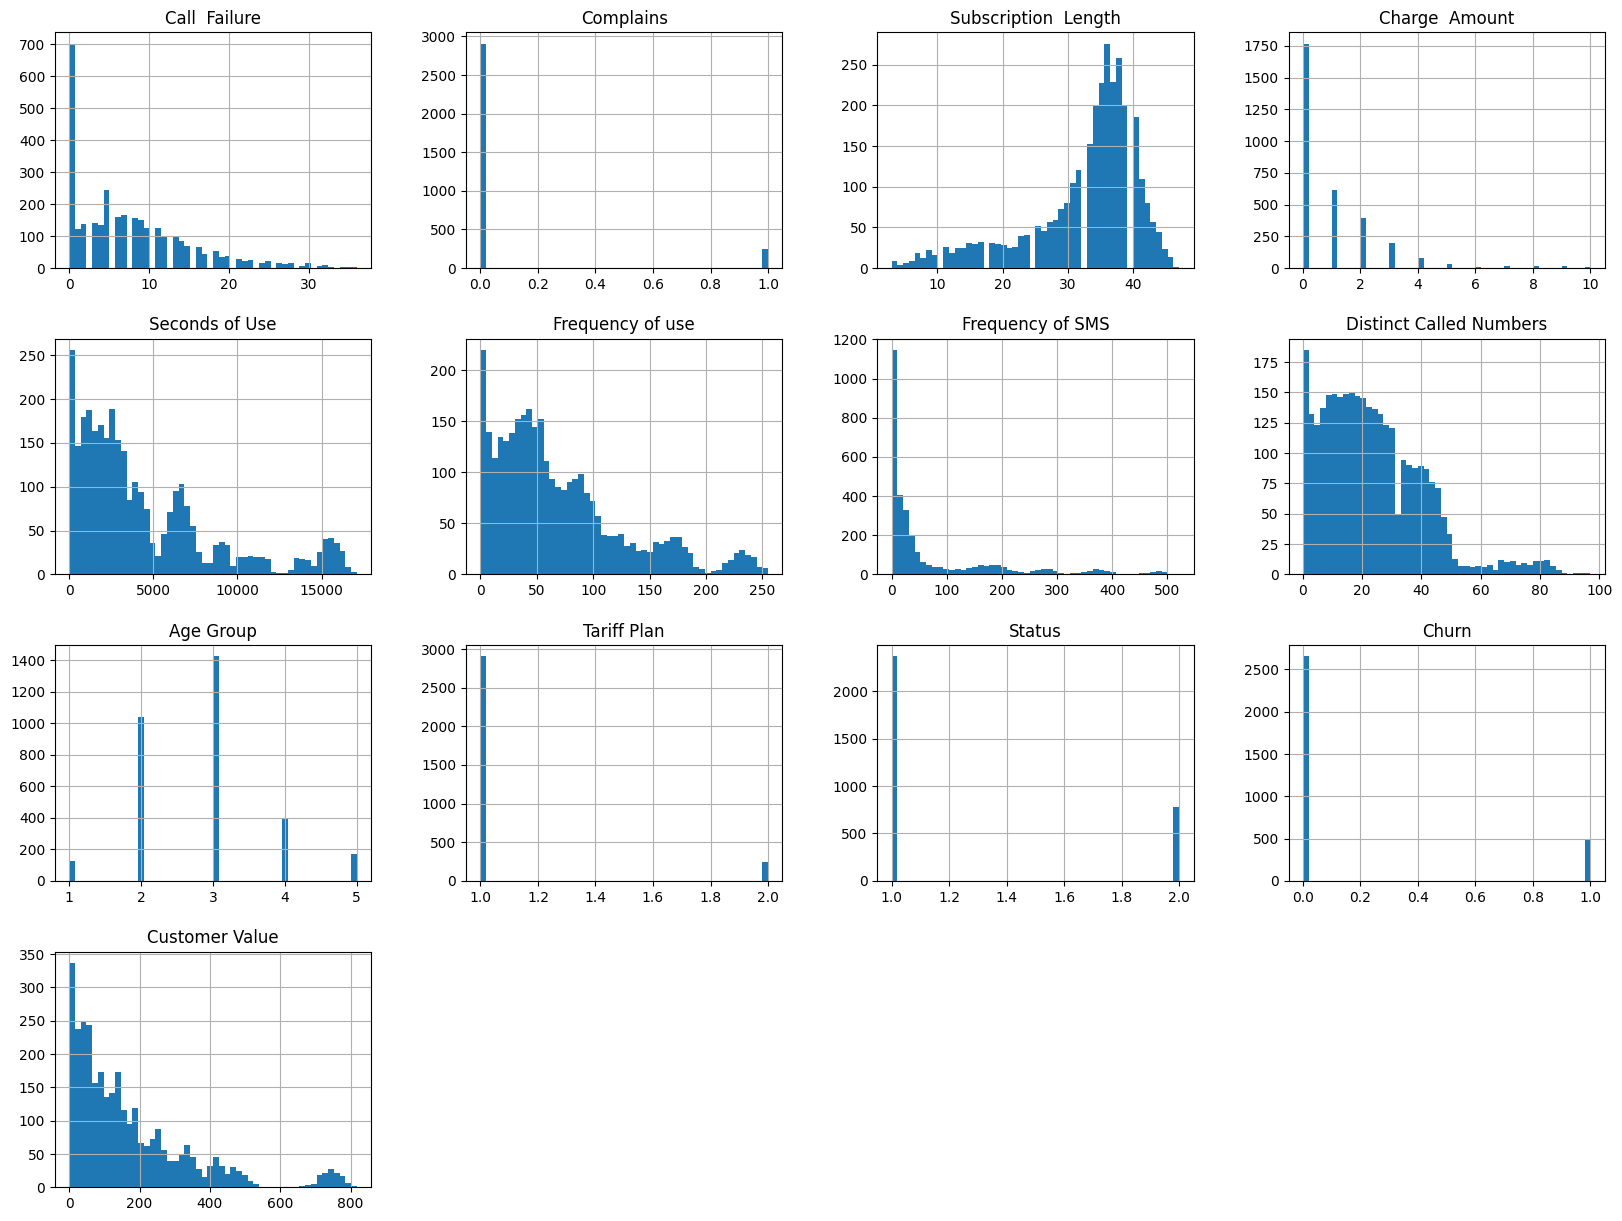

In [6]:
# print histogram of the dataset
dataset.hist(bins=50, figsize=(20,15))
plt.show()



### Analysis of the dataset

Through the analysis of the data and the graphs it can be appreciated that, in the binary characteristics there are many more data in one of the characteristics in the other, a fact that could affect the learning models, on the other hand it can also be appreciated that the distribution of the data, with the exception of the age group does not have a normal distribution, and moreover, most of them tend to group the data in the initial values tending to an inverse distribution, with the exception of the subscription length.

### Feature scaling

Due to the analysis performed on the data and the fact that some learning algorithms that will be used use the gradient descent, which is sensitive to the scale of the data, the decision was made to perform a scaling of the data to improve the convergence processes of the learning algorithms, a normalization, a standardization and the combination of the two will be performed to train each of the models and compare the results obtained and get the best model that manages to classify the data.

In [7]:
# standardize and normalize the dataset
from sklearn.preprocessing import StandardScaler, Normalizer

# first we separate the features from the classified class
features = dataset.drop('Churn', axis=1)
# we take the classified class
class_target = dataset['Churn']

# we create the scaler and normalizer objects
sc = StandardScaler()
norm = Normalizer()
# only standardize dataset in pandas dataframe
std_features = pd.DataFrame(sc.fit_transform(features), columns=features.columns, index=features.index)
# only normalize dataset
norm_features = pd.DataFrame(norm.fit_transform(features), columns=features.columns, index=features.index)
# standardize and normalize dataset
std_norm_features = pd.DataFrame(norm.fit_transform(std_features), columns=features.columns, index=features.index)

### Splitting the dataset

Apart from the scaling of the data, the data set will be separated in a proportion of 80% and 20% where the same 80% of the data will be used to train each of the learning machines and the effectiveness of each of the machines will be verified with the remaining 20% of the data.

In [8]:
from sklearn.model_selection import train_test_split
# split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    features, class_target, test_size=0.2, random_state=0)
# split standardized dataset into train and test
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(
    std_features, class_target, test_size=0.2, random_state=0)
# split normalized dataset into train and test
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(
    norm_features, class_target, test_size=0.2, random_state=0)
# split standardized and normalized dataset into train and test
X_train_std_norm, X_test_std_norm, y_train_std_norm, y_test_std_norm = train_test_split(
    std_norm_features, class_target, test_size=0.2, random_state=0)

X_trains = [X_train, X_train_std, X_train_norm, X_train_std_norm]
X_tests = [X_test, X_test_std, X_test_norm, X_test_std_norm]
y_trains = [y_train, y_train_std, y_train_norm, y_train_std_norm]
y_tests = [y_test, y_test_std, y_test_norm, y_test_std_norm]

### Learning models

The learning machines that will be used to try to classify the data will be the following:

- Perceptron: to know and test if the data are linearly separable.

- MLP: In case the data are not linearly separable, look for a more complex separation rule by the use of the gradient descent algorithm, in the same way this learning machine will be used due to its versatility for the separability of more complex regions.

- SVM: This machine will be used to classify the data taking a different approach to the previous learning machine in order to compare different algorithms and see which one classifies the data better.

In [9]:
# perceptron model
from sklearn.linear_model import Perceptron
# create dataframe to store the results
index = ['Original', 'Standardized', 'Normalized', 'Standardized and Normalized']
columns = pd.MultiIndex.from_tuples([('Train', 'Score'), ('Train', 'Errors'), ('Test', 'Score'), ('Test', 'Errors')], names=['', ''])
perceptron_results = pd.DataFrame(columns=columns, index=index)
# iterate over the datasets
for i in range(len(X_trains)):
    # create perceptron model
    perceptron = Perceptron(max_iter=10000)
    # train perceptron model
    perceptron.fit(X_trains[i], y_trains[i])
    # predict test set
    y_pred = perceptron.predict(X_tests[i])
    # predict train set
    y_pred_train = perceptron.predict(X_trains[i])
    # store the results
    perceptron_results.loc[index[i]] = [round(perceptron.score(X_trains[i], y_trains[i]), 4), (y_trains[i] != y_pred_train).sum(), round(perceptron.score(X_tests[i], y_tests[i]), 4), (y_tests[i] != y_pred).sum()]

# print the results
print(perceptron_results)
# save the results in a csv file
perceptron_results.to_csv('csv/perceptron.csv')

                              Train           Test       
                              Score Errors   Score Errors
Original                     0.8476    384  0.8429     99
Standardized                 0.8159    464  0.8175    115
Normalized                    0.854    368  0.8429     99
Standardized and Normalized  0.8671    335  0.8571     90


### Tuning the parameters of the MLP

The MLP is a learning machine that has a large number of parameters that can be tuned to improve the performance of the machine, in this case the parameters that will be tuned are the following:

- Number of neurons in the hidden layer: The number of neurons that will be used will be 3, 5 and 7
- Activation function: The activation functions that will be used will be the sigmoid, the tanh and the relu.

In [10]:
from sklearn.neural_network import MLPClassifier
# create dataframe to store the results
index = ['Original', 'Standardized', 'Normalized', 'Standardized and Normalized']
columns = pd.MultiIndex.from_tuples([('Train', 'Score'), ('Train', 'Errors'), ('Test', 'Score'), ('Test', 'Errors')], names=['', ''])
# tuning parameters
hidden_layer_sizes = [3, 5, 7]
activation = ['logistic', 'tanh', 'relu']
index = pd.MultiIndex.from_product([hidden_layer_sizes, activation, index], names=['Hidden Layer Sizes', 'Activation', 'Dataset Type'])
mpl_results = pd.DataFrame(columns=columns, index=index)
# iterate over the tuning parameters
j = 0
for hls in hidden_layer_sizes:
    for acti in activation:
      for i in range(len(X_trains)):
          # create MLP model
          mlp = MLPClassifier(max_iter=10000, hidden_layer_sizes=[hls], activation=acti, solver='sgd')
          # train perceptron model
          mlp.fit(X_trains[i], y_trains[i])
          # predict test set
          y_pred = mlp.predict(X_tests[i])
          # predict train set
          y_pred_train = mlp.predict(X_trains[i])
          # store the results
          mpl_results.loc[index[j]] = [round(mlp.score(X_trains[i], y_trains[i]), 4), (y_trains[i] != y_pred_train).sum(), round(mlp.score(X_tests[i], y_tests[i]), 4), (y_tests[i] != y_pred).sum()]
          j += 1

# print the results
print(mpl_results)
# save the results in a csv file
mpl_results.to_csv('csv/mlp.csv')

                                                            Train          
                                                            Score Errors   
Hidden Layer Sizes Activation Dataset Type                                 
3                  logistic   Original                     0.8468    386  \
                              Standardized                 0.9004    251   
                              Normalized                   0.8468    386   
                              Standardized and Normalized  0.8468    386   
                   tanh       Original                     0.8468    386   
                              Standardized                 0.8929    270   
                              Normalized                   0.8468    386   
                              Standardized and Normalized  0.9008    250   
                   relu       Original                     0.8448    391   
                              Standardized                 0.9032    244   
            

In [11]:
# print the results that have the highest test score
print(mpl_results.sort_values(by=[('Test', 'Score')], ascending=False).head(10))
# save the results that have the highest test score to a csv file
mpl_results.sort_values(by=[('Test', 'Score')], ascending=False).head(10).to_csv('csv/mlp_top10.csv')

                                                            Train          
                                                            Score Errors   
Hidden Layer Sizes Activation Dataset Type                                 
7                  relu       Standardized                 0.9091    229  \
3                  relu       Standardized                 0.9032    244   
5                  relu       Standardized                 0.9048    240   
                   tanh       Standardized                 0.9048    240   
7                  logistic   Standardized                 0.9004    251   
                   tanh       Standardized and Normalized   0.902    247   
5                  relu       Standardized and Normalized  0.9016    248   
3                  logistic   Standardized                 0.9004    251   
5                  logistic   Standardized                 0.8984    256   
                   tanh       Standardized and Normalized  0.8944    266   

           

### Tuning the parameters of the SVM

The SVM is a learning machine that has a large number of parameters that can be tuned to improve the performance of the machine, in this case the parameters that will be tuned are the following:

- Kernel: The kernels that will be used will be the linear, the polynomial and the rbf.
- C: THe C value represents the penalty of the error term (regularization), the values that will be used will be 0.1, 1 and 10.
- Gamma/degree: The gamma value represents the influence of a single training example, the values that will be used will be the calculate by the library, that are 'scale' (1 / (n_features * X.var())) and 'auto' (1 / n_features). In the case of the polynomial kernel, the max degree used by the polynomial, the values that will be used will be 2, 3 and 4.

In [12]:
from sklearn.svm import SVC
# tuning parameters
kernel = ['linear', 'poly', 'rbf']
C_values = [0.1, 1, 10]
gamma_values = ['scale', 'auto']
poly_degree = [2, 3, 4]

dataset_type = ['Original', 'Standardized', 'Normalized', 'Standardized and Normalized']
index = pd.MultiIndex.from_tuples([
    *[('Linear', C, 'N/A', ds_type) for C in C_values for ds_type in dataset_type],
    *[('Polynomial', C, degree, ds_type) for C in C_values for degree in poly_degree for ds_type in dataset_type],
    *[('RBF', C, gamma, ds_type) for C in C_values for gamma in gamma_values for ds_type in dataset_type]
], names=['Kernel', 'C', 'Gamma/Degree', 'Dataset Type'])
columns = pd.MultiIndex.from_tuples([('Train', 'Score'), ('Train', 'Errors'), ('Test', 'Score'), ('Test', 'Errors')], names=['', ''])
svm_results = pd.DataFrame(columns=columns, index=index)

# iterate over the tuning parameters
j = 0
for k in kernel:
    if k == 'linear':
        for C in C_values:
            for i in range(len(X_trains)):
                # create SVM model
                svm = SVC(kernel=k, C=C)
                # train SVM model
                svm.fit(X_trains[i], y_trains[i])
                # predict test set
                y_pred = svm.predict(X_tests[i])
                # predict train set
                y_pred_train = svm.predict(X_trains[i])
                # store the results
                svm_results.loc[index[j]] = [round(svm.score(X_trains[i], y_trains[i]), 4), (y_trains[i] != y_pred_train).sum(), round(svm.score(X_tests[i], y_tests[i]), 4), (y_tests[i] != y_pred).sum()]
                j += 1
    elif k == 'poly':
        for C in C_values:
            for degree in poly_degree:
                for i in range(len(X_trains)):
                    # create SVM model
                    svm = SVC(kernel=k, C=C, degree=degree)
                    # train SVM model
                    svm.fit(X_trains[i], y_trains[i])
                    # predict test set
                    y_pred = svm.predict(X_tests[i])
                    # predict train set
                    y_pred_train = svm.predict(X_trains[i])
                    # store the results
                    svm_results.loc[index[j]] = [round(svm.score(X_trains[i], y_trains[i]), 4), (y_trains[i] != y_pred_train).sum(), round(svm.score(X_tests[i], y_tests[i]), 4), (y_tests[i] != y_pred).sum()]
                    j += 1
    elif k == 'rbf':
        for C in C_values:
            for gamma in gamma_values:
                for i in range(len(X_trains)):
                    # create SVM model
                    svm = SVC(kernel=k, C=C, gamma=gamma)
                    # train SVM model
                    svm.fit(X_trains[i], y_trains[i])
                    # predict test set
                    y_pred = svm.predict(X_tests[i])
                    # predict train set
                    y_pred_train = svm.predict(X_trains[i])
                    # store the results
                    svm_results.loc[index[j]] = [round(svm.score(X_trains[i], y_trains[i]), 4), (y_trains[i] != y_pred_train).sum(), round(svm.score(X_tests[i], y_tests[i]), 4), (y_tests[i] != y_pred).sum()]
                    j += 1

# print the results
print(svm_results)

                                                       Train           Test   
                                                       Score Errors   Score   
Kernel C    Gamma/Degree Dataset Type                                         
Linear 0.1  N/A          Original                     0.8996    253  0.8825  \
                         Standardized                  0.898    257  0.8857   
                         Normalized                   0.8468    386   0.827   
                         Standardized and Normalized  0.8976    258  0.8841   
       1.0  N/A          Original                     0.9107    225  0.9016   
...                                                      ...    ...     ...   
RBF    10.0 scale        Standardized and Normalized  0.9631     93  0.9413   
            auto         Original                     0.9905     24  0.8714   
                         Standardized                 0.9579    106  0.9381   
                         Normalized                 

In [14]:
# print the results that have the highest test score
print(svm_results.sort_values(by=[('Test', 'Score')], ascending=False).head(10))
# save the results to a csv file
svm_results.to_csv('csv/svm.csv')
# save the results that have the highest test score to a csv file
svm_results.sort_values(by=[('Test', 'Score')], ascending=False).head(10).to_csv('csv/svm_top10.csv')
# save the results that have the highest test score to a excel file
svm_results.sort_values(by=[('Test', 'Score')], ascending=False).head(10).to_excel('csv/svm_top10.xlsx')
# save the results to a html file
svm_results.to_html('csv/svm.html')

                                                           Train          
                                                           Score Errors   
Kernel     C    Gamma/Degree Dataset Type                                 
Polynomial 10.0 4            Standardized and Normalized  0.9655     87  \
RBF        10.0 scale        Standardized and Normalized  0.9631     93   
Polynomial 10.0 3            Standardized and Normalized  0.9627     94   
RBF        10.0 auto         Standardized                 0.9579    106   
                scale        Standardized                 0.9579    106   
Polynomial 10.0 4            Standardized                 0.9512    123   
                3            Standardized                 0.9532    118   
                2            Standardized and Normalized  0.9345    165   
           1.0  3            Standardized and Normalized  0.9377    157   
                4            Standardized and Normalized  0.9417    147   

                        

### Comparison of the three models

The three models will be compared by the accuracy, precision, recall and f1-score metrics, the results obtained are the following:

             Train           Test       
             Score Errors   Score Errors
Perceptron  0.8671    335  0.8571     90
MLP         0.9091    229  0.8968     65
SVM         0.9655     87  0.9476     33


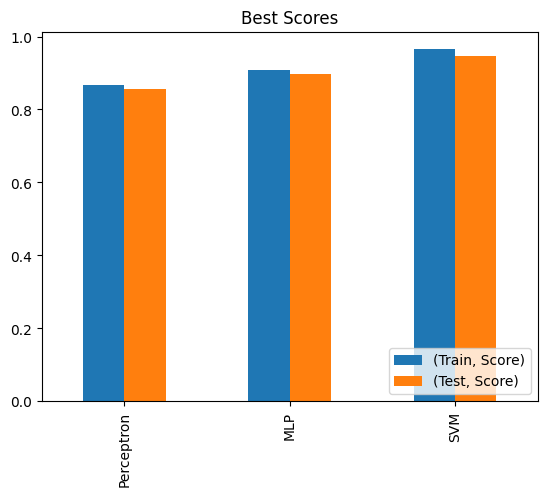

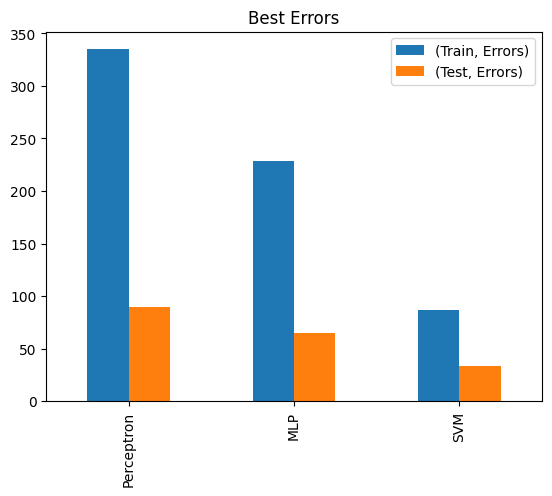

In [19]:
best_perceptron = perceptron_results.sort_values(by=[('Test', 'Score')], ascending=False).head(1)
best_mlp = mpl_results.sort_values(by=[('Test', 'Score')], ascending=False).head(1)
best_svm = svm_results.sort_values(by=[('Test', 'Score')], ascending=False).head(1)

# create a dataframe to store the best results
index = ['Perceptron', 'MLP', 'SVM']
columns = pd.MultiIndex.from_tuples([('Train', 'Score'), ('Train', 'Errors'), ('Test', 'Score'), ('Test', 'Errors')], names=['', ''])
best_results = pd.DataFrame(columns=columns, index=index)

# store the best results
best_results.loc['Perceptron'] = best_perceptron.loc[best_perceptron.index[0]]
best_results.loc['MLP'] = best_mlp.loc[best_mlp.index[0]]
best_results.loc['SVM'] = best_svm.loc[best_svm.index[0]]

# print the best results
print(best_results)
# plot the best results
# plot the scores
best_results.plot(kind='bar', y=[('Train', 'Score'), ('Test', 'Score')], title='Best Scores')
# change the location of the legend
plt.legend(loc='lower right')
# plot the errors
best_results.plot(kind='bar', y=[('Train', 'Errors'), ('Test', 'Errors')], title='Best Errors')
plt.legend(loc='upper right')
plt.show()
